In [1]:
from enum import Enum

In [2]:
class Cell(str, Enum):
    EMPTY = " ",
    BLOCKED= "X"

In [28]:
import random 
class Maze:
    def random_fill(self, rows: int, columns: int):
        self.grid = [[Cell.EMPTY for  c in range(columns)] for r in range(rows)]
        for row in range(rows):
            for col in range(columns):
                if random.uniform(0, 1.0) < 0.4:
                    self.grid[row][col] = Cell.BLOCKED

    def __str__(self):
        result = ""
        for row in self.grid:
            for cell in row:
                result+=cell
            result+='\n'
        return result

In [30]:
maze = Maze()
maze.random_fill(30, 30)
print(maze)

   X XX  XXXX  XXXX  X       X
   X  XXXX XX  XXXXXX  XXX X X
   X X XX  X X X   XX XXXXX XX
 XX    X X    X XXX X X    X  
XX X XX   X  XXX      X   X  X
 XX X     X      X X  XX X X  
X        X  X X XX X     X  XX
XX  X XX X   X X X XX XX   X X
X     XX X  XXXX  X   X XX  X 
    X  XXX X    X X   XXXXXX  
  X X XXX XXXX    X X X X   X 
X X   X  X X   XXX  X  X  XXXX
X  X X    X X   XXXX  XX  X   
X X  X XX X  X   X XX       XX
   XX     X X   X  XXX  XX XXX
  X X   X X XXXX X     X      
   X   X     X  X  X X   XXX  
XX XXXXXXX X     X X   X  XX X
X  X X X XXXX    X  X XX  XX X
   X     X X XXX    X      X  
 X XX  X   XX XXX    X   X    
 X XXX XX X XX    X  X  X X XX
X XXX      X X  XXX   X XXX X 
XX X   X  XX    XXX  X   XXX X
         X X  X  X  X    XXXXX
    X X    X X  X     X XXX  X
 X    X  XX   XX   XXX XXX X X
XX  X X X X X XX  X X   XXX  X
 X X  X     X X  XX   X X     
X  X X X XX X  X X  X   X  XX 



In [12]:
!pip install numpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.3/16.3 MB 28.4 MB/s eta 0:00:00a 0:00:01


In [13]:
import numpy as np

In [31]:
!pip install pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 29.8 MB/s eta 0:00:0000:010:01


In [32]:
!ls

Untitled.ipynb	example.ipynb


In [33]:
!pip install pyarrow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 20.6 MB/s eta 0:00:0000:0100:01


In [34]:
import pyarrow as pa

In [35]:
employee_table = pa.table({
    "employee_id": [11, 12], 
    "employee_name": ['Ivan', 'Petr'], 
    'joiming_date': [20240101, 20240101], 
    'salary': [123, 124], 
    'address': ['test', 'test2']
})

In [36]:
from pyarrow import parquet

In [38]:
parquet.write_table(employee_table, "employee.parquet")

In [40]:
table = parquet.read_table("employee.parquet")

In [41]:
import pandas as pd

In [42]:
employee_df = table.to_pandas()

In [43]:
employee_df.head()

,employee_id,employee_name,joiming_date,salary,address
0,11,Ivan,20240101,123,test
1,12,Petr,20240101,124,test2


In [45]:
employee_df['employee_id']

0    11
1    12
Name: employee_id, dtype: int64

In [52]:
!pip install seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 29.8 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 33.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 20.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 24.8 MB/s eta 0:00:00


In [53]:
%matplotlib inline

In [54]:
import seaborn

In [55]:
flights_flat = seaborn.load_dataset("flights")

In [59]:
flights = flights_flat.pivot(index="month", columns="year", values="passengers")

In [60]:
flights.head()

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472


Text(0.5, 1.0, 'Number of flights')

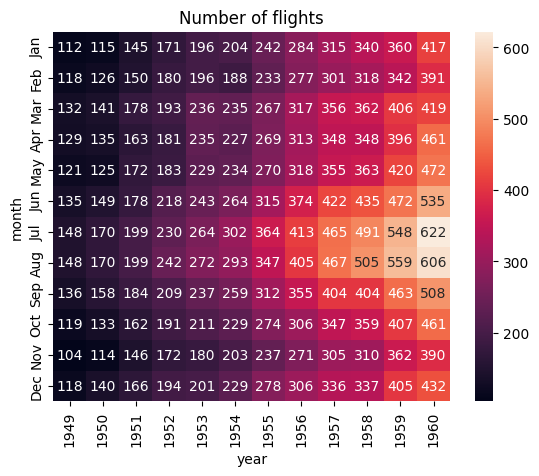

In [64]:
from matplotlib import pyplot
seaborn.heatmap(flights, annot=True, fmt='d')
pyplot.title('Number of flights')